# COVID-19 - Italy - Population

## Initial setup

In [2]:
from urllib.request import urlopen
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

url_tpl_wb = "https://api.worldbank.org/v2/en/country/{cc}/indicator/{ic}?format=json&per_page=100"

def get_df_for_wb_indicator(country_code, indicator_code):
    response = urlopen(url_tpl_wb.format(cc=country_code, ic=indicator_code))
    data = json.loads(response.read())
    # df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]), columns=['a', 'b', 'c'])
    cols = ['country', 'year', indicator_code]
    rows = []
    for item in data[1]:
        rows.append([item["countryiso3code"], item["date"], item["value"]])
    wbdf = pd.DataFrame(np.array(rows), columns=cols)
    return wbdf


In [3]:
# Get total population(SP.POP.TOTL)
pop = get_df_for_wb_indicator('ITA', 'SP.POP.TOTL')
pop = pop.append(get_df_for_wb_indicator('FRA', 'SP.POP.TOTL'))
pop = pop.append(get_df_for_wb_indicator('DEU', 'SP.POP.TOTL'))
pop = pop.append(get_df_for_wb_indicator('HUN', 'SP.POP.TOTL'))
pop = pop.append(get_df_for_wb_indicator('DNK', 'SP.POP.TOTL'))
pop["CY"] = pop["country"] + "-" + pop["year"]
pop.set_index('CY', inplace = True)

# Crude Death Rate(SP.DYN.CDRT.IN) over 1,000
cdr = get_df_for_wb_indicator('ITA', 'SP.DYN.CDRT.IN')
cdr = cdr.append(get_df_for_wb_indicator('FRA', 'SP.DYN.CDRT.IN'))
cdr = cdr.append(get_df_for_wb_indicator('DEU', 'SP.DYN.CDRT.IN'))
cdr = cdr.append(get_df_for_wb_indicator('HUN', 'SP.DYN.CDRT.IN'))
cdr = cdr.append(get_df_for_wb_indicator('DNK', 'SP.DYN.CDRT.IN'))
cdr["CY"] = cdr["country"] + "-" + cdr["year"]
cdr.set_index('CY', inplace = True)
cdr.drop(columns=['country', 'year'], axis=1, inplace=True)

# Crude Birth Rate(SP.DYN.CBRT.IN) over 1,000
cbr = get_df_for_wb_indicator('ITA', 'SP.DYN.CBRT.IN')
cbr = cbr.append(get_df_for_wb_indicator('FRA', 'SP.DYN.CBRT.IN'))
cbr = cbr.append(get_df_for_wb_indicator('DEU', 'SP.DYN.CBRT.IN'))
cbr = cbr.append(get_df_for_wb_indicator('HUN', 'SP.DYN.CBRT.IN'))
cbr = cbr.append(get_df_for_wb_indicator('DNK', 'SP.DYN.CBRT.IN'))
cbr["CY"] = cbr["country"] + "-" + cbr["year"]
cbr.set_index('CY', inplace = True)
cbr.drop(columns=['country', 'year'], axis=1, inplace=True)


jd = pop.join(cdr, how = 'inner', on='CY', lsuffix = '_left')
jd = jd.join(cbr, how = 'inner', on='CY', lsuffix = '_left')


In [4]:
jd.head()

,country,year,SP.POP.TOTL,SP.DYN.CDRT.IN,SP.DYN.CBRT.IN
CY,,,,,
ITA-2019,ITA,2019,None,None,None
ITA-2018,ITA,2018,60421760,10.5,7.3
ITA-2017,ITA,2017,60536709,10.7,7.6
ITA-2016,ITA,2016,60627498,10.1,7.8
ITA-2015,ITA,2015,60730582,10.7,8


## Data Preparation / Pre-processing - (Patient)

In [6]:
jd['year'] = pd.to_numeric(jd["year"], errors='coerce')
jd['SP.POP.TOTL'] = pd.to_numeric(jd["SP.POP.TOTL"], errors='coerce')
jd['SP.DYN.CDRT.IN'] = pd.to_numeric(jd["SP.DYN.CDRT.IN"], errors='coerce')
jd['SP.DYN.CBRT.IN'] = pd.to_numeric(jd["SP.DYN.CBRT.IN"], errors='coerce')

jd["CBRT-CDRT"] = jd["SP.DYN.CBRT.IN"] - jd["SP.DYN.CDRT.IN"]

#patient.loc[:, patient.columns.isin(['sex','birth_year','age','age_group'])]
jd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, ITA-2019 to DNK-1960
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         300 non-null    object 
 1   year            300 non-null    int64  
 2   SP.POP.TOTL     295 non-null    float64
 3   SP.DYN.CDRT.IN  295 non-null    float64
 4   SP.DYN.CBRT.IN  295 non-null    float64
 5   CBRT-CDRT       295 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 16.4+ KB


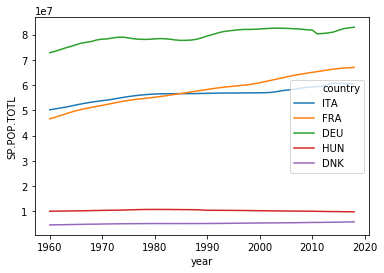

In [7]:
# Plot population
sns.lineplot(x="year", y="SP.POP.TOTL", hue="country", data=jd)




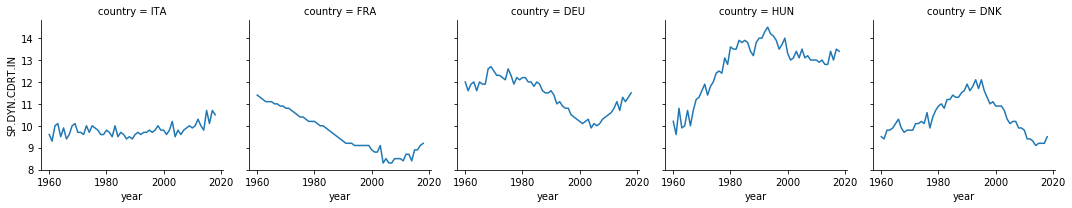

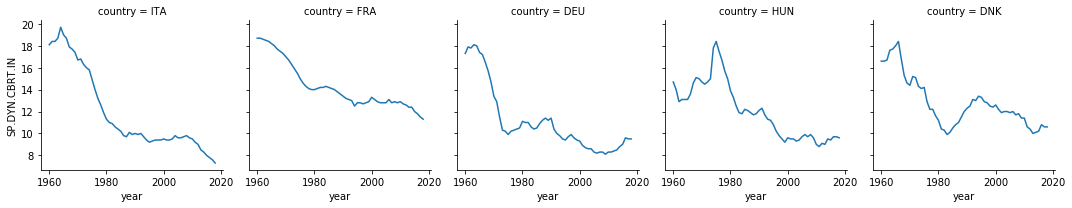

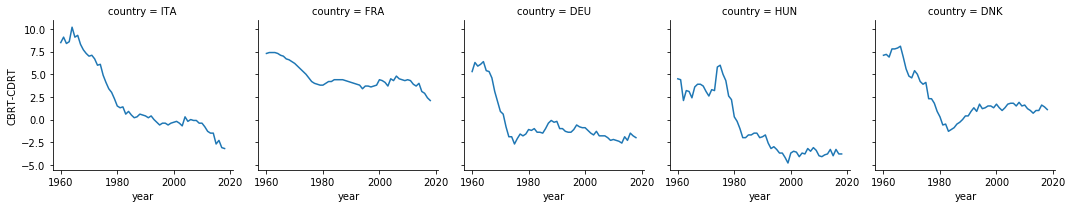

In [10]:
# Plot crude birth/death rates
#sns.lineplot(x="year", y="SP.DYN.CDRT.IN", hue="country", data=jd)
#plt.show()

#sns.lineplot(x="year", y="SP.DYN.CBRT.IN", hue="country", data=jd)
#plt.show()

g = sns.FacetGrid(data=jd, col="country")
g.map(plt.plot, "year", "SP.DYN.CDRT.IN", marker="")

g = sns.FacetGrid(data=jd, col="country")
g.map(plt.plot, "year", "SP.DYN.CBRT.IN", marker="")

g = sns.FacetGrid(data=jd, col="country")
g.map(plt.plot, "year", "CBRT-CDRT", marker="")

